In [61]:
import pandas as pd  # Importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [62]:
customers = pd.read_csv('/content/Customers.csv') # Loading the datasets
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [63]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [64]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [65]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [76]:
ecommerce = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID') # Combine the datasets into one dataframe
ecommerce.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [67]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [80]:
ecommerce['TransactionDate'] = pd.to_datetime(ecommerce['TransactionDate'], format='%Y-%m-%d %H:%M:%S').dt.date  # Converting datetime object to fixed format
ecommerce['SignupDate'] = pd.to_datetime(ecommerce['SignupDate'], format='%Y-%m-%d').dt.date
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [69]:
ecommerce.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [70]:
ecommerce[ecommerce['Price_x'] != ecommerce['Price_y']]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y


In [81]:
ecommerce = ecommerce.drop('Price_y', axis=1) # Removing unnecessary columns
ecommerce = ecommerce.rename(columns={'Price_x': 'Price'})
ecommerce.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [72]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [73]:
ecommerce.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0
CustomerName,0
Region,0
SignupDate,0


In [74]:
ecommerce[ecommerce.duplicated()]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category


In [82]:
ecommerce.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [140]:
ecommerce['Category'].value_counts()

,count
Category,
Books,270
Electronics,254
Home Decor,248
Clothing,228


In [87]:
df = ecommerce['Category'].value_counts()
fig = px.bar(df, x=df.index,
             y=df.values,
             color=df.index,
             text_auto=True,
             title='Number of Products based on Category of Products')
fig.show()

In [88]:
df = ecommerce['Quantity'].value_counts()
fig = px.bar(df, x=df.index,
             y=df.values,
             color=df.index,
             text_auto=True,
             title='Quantity of Products')
fig.show()

In [89]:
fig = px.pie(ecommerce, values='TotalValue',names='Region', title='Region of Customers')
fig.show()

In [132]:
customer_counts_by_region = ecommerce.groupby('Region')['CustomerID'].nunique()

fig = px.bar(x=customer_counts_by_region.index,
             y=customer_counts_by_region.values,
             color=customer_counts_by_region.index,
             text_auto=True,
             title='Number of Customers per Region')
fig.show()

In [149]:
price_distribution = pd.cut(ecommerce['Price'], bins=5)
price_distribution.value_counts()

,count
Price,
"(401.424, 497.76]",256
"(208.752, 305.088]",205
"(112.416, 208.752]",195
"(305.088, 401.424]",190
"(15.598, 112.416]",154


In [147]:
fig = px.histogram(ecommerce, x='Price',nbins=10,title='Total Value of Transactions')
fig.show()

In [96]:
fig = px.box(ecommerce,x='TotalValue',title='Box plot for Total Value')
fig.show()

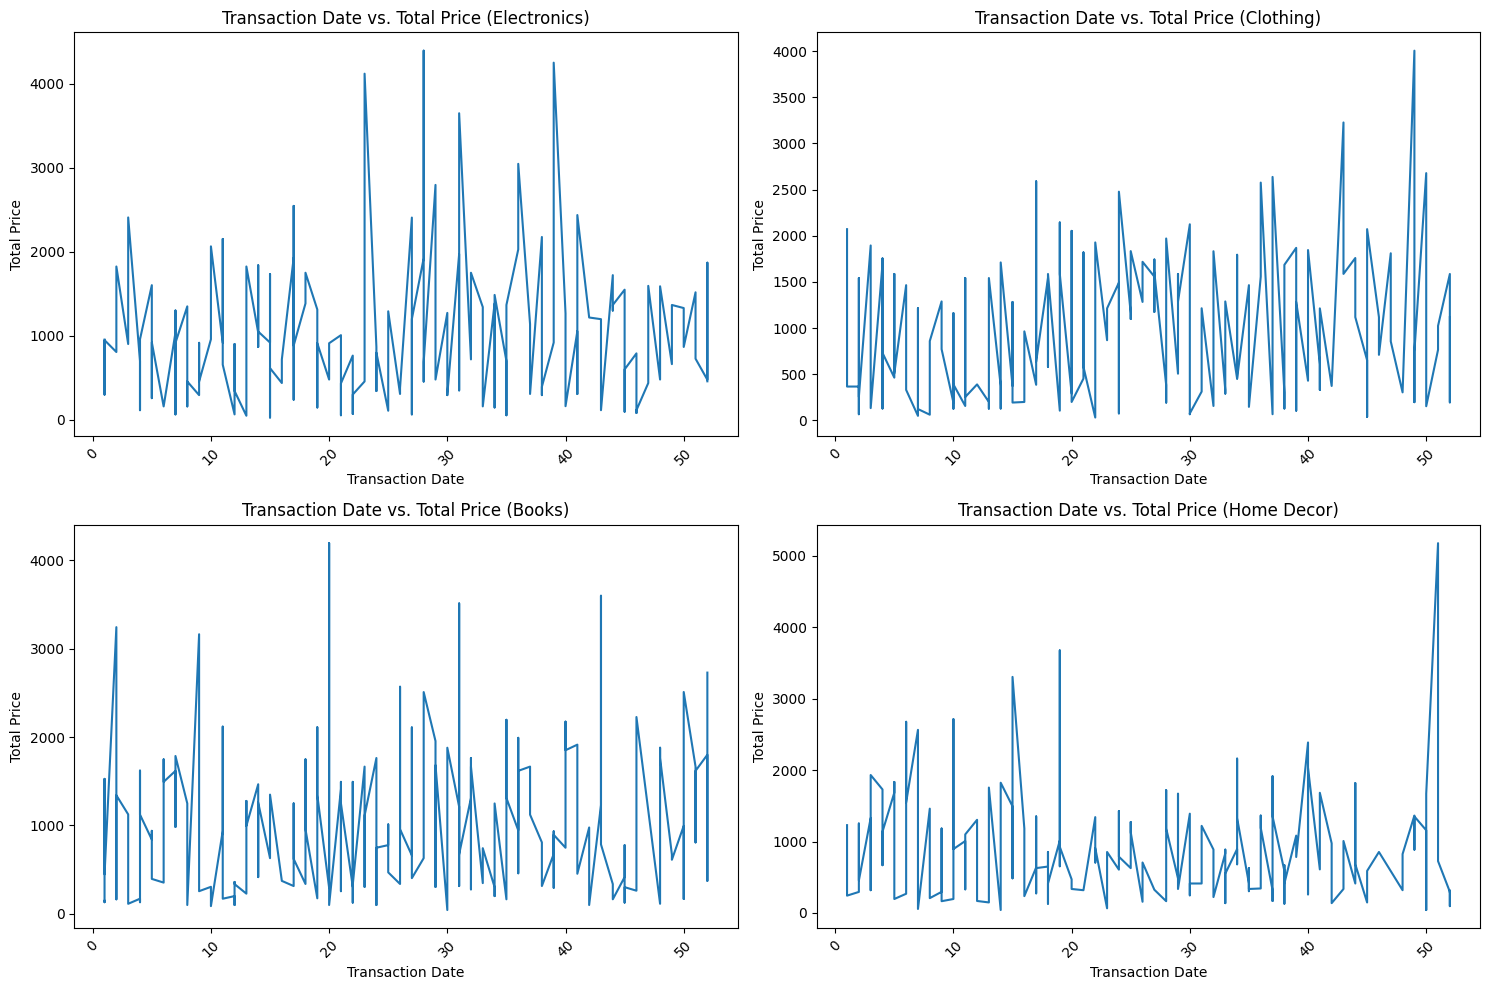

In [127]:
category_sales = ecommerce.groupby(['Category', 'TransactionDate'])['TotalValue'].sum().reset_index()
category_sales['TransactionDate'] = pd.to_datetime(category_sales['TransactionDate']).dt.isocalendar().week
category_sales = category_sales.sort_values(by=['TransactionDate'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

categories = ecommerce['Category'].unique()
for i, category in enumerate(categories):  # Plot the four categories
    row = i // 2
    col = i % 2
    subset = category_sales[category_sales['Category'] == category]
    axes[row, col].plot(subset['TransactionDate'], subset['TotalValue'])
    axes[row, col].set_title(f'Transaction Date vs. Total Price ({category})')
    axes[row, col].set_xlabel('Transaction Date')
    axes[row, col].set_ylabel('Total Price')
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility


plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

In [102]:
ecommerce.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


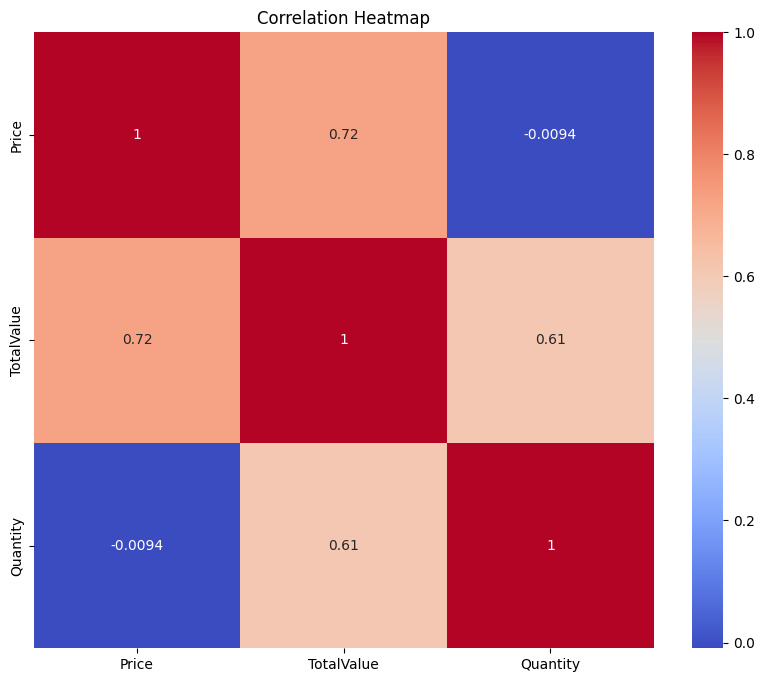

In [103]:
correlation = ecommerce[['Price','TotalValue','Quantity']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm') # Plotting correlation plot
plt.title('Correlation Heatmap')
plt.show()

In [110]:
product_revenue = ecommerce.groupby('ProductName')['TotalValue'].sum().reset_index() # Finding top selling products
product_revenue = product_revenue.sort_values(by='TotalValue', ascending=False)
print("Top Selling Products:")
product_revenue.head(10)

Top Selling Products:


,ProductName,TotalValue
9,ActiveWear Smartwatch,39096.97
47,SoundWave Headphones,25211.64
52,SoundWave Novel,24507.90
4,ActiveWear Jacket,22712.56
6,ActiveWear Rug,22314.43
58,TechPro Headphones,19513.80
15,BookWorld Cookbook,19221.99
21,BookWorld Sweater,18743.79
64,TechPro Textbook,18267.96
2,ActiveWear Cookware Set,18083.73


In [111]:
category_revenue = ecommerce.groupby('Category')['TotalValue'].sum().reset_index() # Finding to selling categories
category_revenue = category_revenue.sort_values(by='TotalValue', ascending=False)

print("\nTop Selling Categories:")
category_revenue


Top Selling Categories:


,Category,TotalValue
0,Books,192147.47
2,Electronics,180783.50
1,Clothing,166170.66
3,Home Decor,150893.93


In [112]:
product_quantity = ecommerce.groupby('ProductName')['Quantity'].sum().reset_index() # Finding products with high volume with low value
product_analysis = pd.merge(product_revenue, product_quantity, on='ProductName')
product_analysis['Avg_Price'] = product_analysis['TotalValue'] / product_analysis['Quantity']
high_volume_low_value = product_analysis[(product_analysis['Quantity'] > product_analysis['Quantity'].quantile(0.75)) & (product_analysis['Avg_Price'] < product_analysis['Avg_Price'].quantile(0.25))]

print("\nProducts with High Volume but Low Value:")
high_volume_low_value


Products with High Volume but Low Value:


,ProductName,TotalValue,Quantity,Avg_Price
39,HomeSense T-Shirt,7528.90,50,150.57800
53,HomeSense Sweater,4083.66,48,85.07625


In [114]:
low_volume_high_value = product_analysis[(product_analysis['Quantity'] < product_analysis['Quantity'].quantile(0.25)) & (product_analysis['Avg_Price'] > product_analysis['Avg_Price'].quantile(0.75))]

print("\nProducts with Low Volume but High Value:")
low_volume_high_value


Products with Low Volume but High Value:


,ProductName,TotalValue,Quantity,Avg_Price
27,HomeSense Running Shoes,10405.66,23,452.42
33,ComfortLiving Mystery Book,8737.80,20,436.89
34,SoundWave T-Shirt,8672.04,18,481.78


In [117]:
customer_revenue = ecommerce.groupby('CustomerID')['TotalValue'].sum().reset_index()

revenue_quantiles = customer_revenue['TotalValue'].quantile([0.25, 0.75]) # Calculate quantiles for revenue segmentation

customer_revenue['CustomerSegment'] = 'Medium' # Segment customers
customer_revenue.loc[customer_revenue['TotalValue'] >= revenue_quantiles[0.75], 'CustomerSegment'] = 'High'
customer_revenue.loc[customer_revenue['TotalValue'] < revenue_quantiles[0.25], 'CustomerSegment'] = 'Low'

segment_analysis = customer_revenue.groupby('CustomerSegment')['TotalValue'].agg(['count', 'sum', 'mean']) # Analyze customer segments
print("\nAnalysis of Customer Segments:")
segment_analysis


Analysis of Customer Segments:


,count,sum,mean
CustomerSegment,,,
High,50,296574.05,5931.481000
Low,50,65639.32,1312.786400
Medium,99,327782.19,3310.931212


In [129]:
product_region_preference = ecommerce.groupby(['Region', 'Category'])['Quantity'].sum().reset_index() #Analyze product preferences across regions
product_region_preference = product_region_preference.sort_values(['Region','Quantity'], ascending=[True,False])

print("\nProduct Preferences Across Regions:")
product_region_preference


Product Preferences Across Regions:


,Region,Category,Quantity
1,Asia,Clothing,166
3,Asia,Home Decor,142
2,Asia,Electronics,132
0,Asia,Books,120
7,Europe,Home Decor,167
4,Europe,Books,165
6,Europe,Electronics,144
5,Europe,Clothing,119
8,North America,Books,155
10,North America,Electronics,153
